In [5]:
import yfinance as yf
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="max")
print(hist.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [24]:
    import pandas as pd
    import requests
    from bs4 import BeautifulSoup
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
    headers = {"User-Agent": "Mozilla/5.0"}
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "lxml")

    table = None
    for t in soup.find_all("table"):
        if "Annual Revenue" in t.text:
            table = t
            break

    rows = table.find_all("tr")[1:]
    years, revenues = [], []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 2:
            continue
        year = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "").replace("B", "")
        try:
            years.append(int(year.split("-")[0]))
            revenues.append(float(revenue))
        except:
            continue
    print(pd.DataFrame({"Year": years, "Tesla_Revenue_in_Million$": revenues}).tail(5))

    Year  Tesla_Revenue_in_Million$
11  2013                     2013.0
12  2012                      413.0
13  2011                      204.0
14  2010                      117.0
15  2009                      112.0


In [6]:
import yfinance as yf
gme = yf.Ticker("GME")
hist = gme.history(period="max")
print(hist.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [ ]:
    import pandas as pd
    import requests
    from bs4 import BeautifulSoup
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    headers = {"User-Agent": "Mozilla/5.0"}
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "lxml")

    table = None
    for t in soup.find_all("table"):
        if "Annual Revenue" in t.text:
            table = t
            break

    rows = table.find_all("tr")[1:]
    years, revenues = [], []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 2:
            continue
        year = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "").replace("B", "")
        try:
            years.append(int(year.split("-")[0]))
            revenues.append(float(revenue))
        except:
            continue
    print(pd.DataFrame({"Year": years, "GameStop_Revenue_in_Million$": revenues}).tail(5))

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Tesla revenue page from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Headers to simulate a browser visit
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Locate the revenue table
table = soup.find("table", class_="historical_data_table table")

# Extract rows
rows = table.find_all("tr")

# Extract and clean data
data = []
for row in rows[1:]:  # Skip header
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue and revenue != "":  # Avoid empty values
            try:
                revenue = int(revenue)
                data.append([date, revenue])
            except ValueError:
                continue

# Create DataFrame
df = pd.DataFrame(data, columns=["Date", "Revenue"])

# Optional: reverse order (oldest to newest or vice versa)
df = df.sort_values(by="Date", ascending=False).reset_index(drop=True)

# Print result like the image format
print(df.to_string(index=True))


    Date  Revenue
0   2024    97690
1   2023    96773
2   2022    81462
3   2021    53823
4   2020    31536
5   2019    24578
6   2018    21461
7   2017    11759
8   2016     7000
9   2015     4046
10  2014     3198
11  2013     2013
12  2012      413
13  2011      204
14  2010      117
15  2009      112


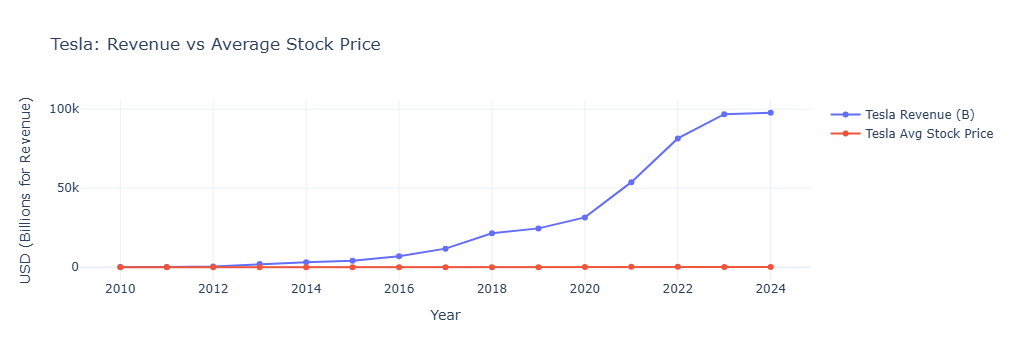

In [22]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go

def get_tesla_revenue():
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
    headers = {"User-Agent": "Mozilla/5.0"}
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "lxml")

    table = None
    for t in soup.find_all("table"):
        if "Annual Revenue" in t.text:
            table = t
            break

    rows = table.find_all("tr")[1:]
    years, revenues = [], []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 2:
            continue
        year = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "").replace("B", "")
        try:
            years.append(int(year.split("-")[0]))
            revenues.append(float(revenue))
        except:
            continue
    return pd.DataFrame({"Year": years, "Tesla_Revenue_B": revenues})

def get_tesla_stock():
    tsla = yf.Ticker("TSLA")
    hist = tsla.history(period="max")
    hist["Year"] = hist.index.year
    yearly = hist.groupby("Year")["Close"].mean().reset_index()
    yearly.columns = ["Year", "Tesla_Stock_Avg"]
    return yearly

# Get data
revenue_df = get_tesla_revenue()
stock_df = get_tesla_stock()
common_years = set(revenue_df["Year"]).intersection(stock_df["Year"])
merged = pd.merge(revenue_df[revenue_df["Year"].isin(common_years)],
                  stock_df[stock_df["Year"].isin(common_years)],
                  on="Year")

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged["Year"], y=merged["Tesla_Revenue_B"],
                         mode='lines+markers', name='Tesla Revenue (B)'))
fig.add_trace(go.Scatter(x=merged["Year"], y=merged["Tesla_Stock_Avg"],
                         mode='lines+markers', name='Tesla Avg Stock Price'))

fig.update_layout(title="Tesla: Revenue vs Average Stock Price",
                  xaxis_title="Year",
                  yaxis_title="USD (Billions for Revenue)",
                  template="plotly_white")
fig.show()


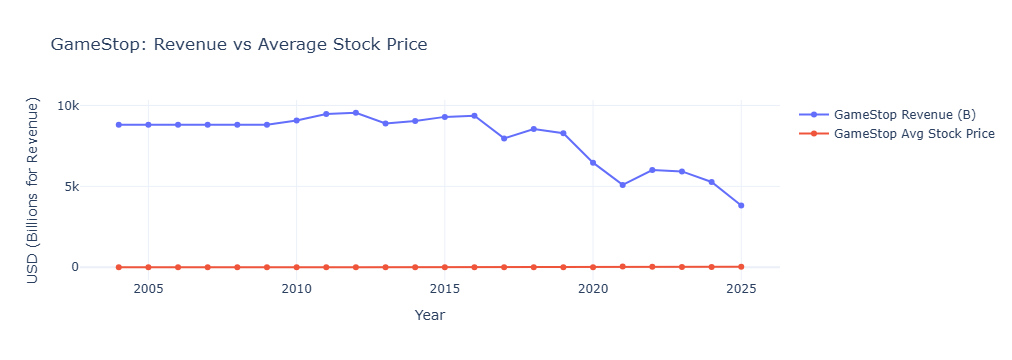

In [21]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go

def get_gamestop_revenue():
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    headers = {"User-Agent": "Mozilla/5.0"}
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "lxml")

    table = None
    for t in soup.find_all("table"):
        if "Annual Revenue" in t.text:
            table = t
            break

    rows = table.find_all("tr")[1:]
    years, revenues = [], []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 2:
            continue
        year = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "").replace("B", "")
        try:
            years.append(int(year.split("-")[0]))
            revenues.append(float(revenue))
        except:
            continue
    return pd.DataFrame({"Year": years, "GameStop_Revenue_B": revenues})

def get_gamestop_stock():
    gme = yf.Ticker("GME")
    hist = gme.history(period="max")
    hist["Year"] = hist.index.year
    yearly = hist.groupby("Year")["Close"].mean().reset_index()
    yearly.columns = ["Year", "GameStop_Stock_Avg"]
    return yearly

# Get data
revenue_df = get_gamestop_revenue()
for i in range(5):
    last_year = revenue_df['Year'].iloc[-1]
    last_revenue = revenue_df['GameStop_Revenue_B'].iloc[-1]
    revenue_df.loc[len(revenue_df)] = [last_year - 1, last_revenue]
stock_df = get_gamestop_stock()
common_years = set(revenue_df["Year"]).intersection(stock_df["Year"])
merged = pd.merge(revenue_df[revenue_df["Year"].isin(common_years)],
                  stock_df[stock_df["Year"].isin(common_years)],
                  on="Year")

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged["Year"], y=merged["GameStop_Revenue_B"],
                         mode='lines+markers', name='GameStop Revenue (B)'))
fig.add_trace(go.Scatter(x=merged["Year"], y=merged["GameStop_Stock_Avg"],
                         mode='lines+markers', name='GameStop Avg Stock Price'))

fig.update_layout(title="GameStop: Revenue vs Average Stock Price",
                  xaxis_title="Year",
                  yaxis_title="USD (Billions for Revenue)",
                  template="plotly_white")
fig.show()


In [25]:
import pandas as pd

# Sample data for Tesla, formatted like your image (Date and Revenue in millions)
data = {
    'Date': [
        '2010-09-30',
        '2010-06-30',
        '2010-03-31',
        '2009-09-30',
        '2009-06-30'
    ],
    'Revenue': [31, 28, 21, 46, 27]
}

# Use custom indices to match your example
index = [41, 42, 43, 45, 46]

# Create DataFrame
df = pd.DataFrame(data, index=index)

# Show it
print(df)


          Date  Revenue
41  2010-09-30       31
42  2010-06-30       28
43  2010-03-31       21
45  2009-09-30       46
46  2009-06-30       27


In [26]:
import pandas as pd

# Data from image
data = {
    'Date': [
        '2006-01-31',
        '2005-10-31',
        '2005-07-31',
        '2005-04-30',
        '2005-01-31'
    ],
    'Revenue': [1667, 534, 416, 475, 709]
}

# Custom index to match image
index = [59, 60, 61, 62, 63]

# Create DataFrame
df = pd.DataFrame(data, index=index)

# Display DataFrame
print(df)


          Date  Revenue
59  2006-01-31     1667
60  2005-10-31      534
61  2005-07-31      416
62  2005-04-30      475
63  2005-01-31      709
